In [1]:
# credibility,
# balance, 
# duration,
# history,
# purpose,
# credit_amount,
# savings,
# employment,
# instPercent,
# sexMarried,
# guarantors,
# residence,
# assets,
# age,
# conc_credit,
# housing,
# credits,
# job,
# dependents,
# has_phone,
# foreign

In [2]:
PATH = "/home/biennt/Documents/Source_code/sparkProject/codeSpark"
data = sc.textFile(PATH+"/data/german.data")


In [3]:


splited = data.flatMap(lambda file: file.split("\n")) \
                .map(lambda lines: lines.split(" "))


In [4]:
cols = ['balance', 
        'duration',
        'history',
        'purpose',
        'credit_amount',
        'savings',
        'employment',
        'instPercent',
        'sexMarried',
        'guarantors',
        'residence',
        'assets',
        'age',
        'conc_credit',
        'housing',
        'credits',
        'job',
        'dependents',
        'hasPhone',
        'foreign',
        'credibility'
        ]

In [5]:
df = splited.toDF(cols)
display(df)

DataFrame[balance: string, duration: string, history: string, purpose: string, credit_amount: string, savings: string, employment: string, instPercent: string, sexMarried: string, guarantors: string, residence: string, assets: string, age: string, conc_credit: string, housing: string, credits: string, job: string, dependents: string, hasPhone: string, foreign: string, credibility: string]

In [6]:
from pyspark.ml.feature import StringIndexer
from pyspark.sql.types import FloatType
INDEXED = '_indexed'

for idx, val in enumerate(cols):
    if idx in [1,4,7,10,12,15,17]:
        df = df.withColumn(val, df[val].cast(FloatType()))

balance = StringIndexer(inputCol=cols[0], outputCol=cols[0]+ INDEXED)

history = StringIndexer(inputCol=cols[2], outputCol=cols[2]+ INDEXED)

purpose = StringIndexer(inputCol=cols[3], outputCol=cols[3]+ INDEXED)

savings = StringIndexer(inputCol=cols[5], outputCol=cols[5]+ INDEXED)

employment = StringIndexer(inputCol=cols[6], outputCol=cols[6]+ INDEXED)

sexMarried = StringIndexer(inputCol=cols[8], outputCol=cols[8]+ INDEXED)

guarantors = StringIndexer(inputCol=cols[9], outputCol=cols[9]+ INDEXED)

assets = StringIndexer(inputCol=cols[11], outputCol=cols[11]+ INDEXED)

conc_credit = StringIndexer(inputCol=cols[13], outputCol=cols[13]+ INDEXED)

housing = StringIndexer(inputCol=cols[14], outputCol=cols[14]+ INDEXED)

job = StringIndexer(inputCol=cols[16], outputCol=cols[16]+ INDEXED)

hasPhone = StringIndexer(inputCol=cols[18], outputCol=cols[18]+ INDEXED)

foreign = StringIndexer(inputCol=cols[19], outputCol=cols[19]+ INDEXED)

credibility = StringIndexer(inputCol=cols[20], outputCol=cols[20]+ INDEXED)



In [7]:
balance_model = balance.fit(df)
history_model = history.fit(df)
purpose_model = purpose.fit(df)
savings_model = savings.fit(df)
employment_model = employment.fit(df)
sexMarried_model = sexMarried.fit(df)
guarantors_model = guarantors.fit(df)
assets_model = assets.fit(df)
conc_credit_model = conc_credit.fit(df)
housing_model = housing.fit(df)
job_model = job.fit(df)
hasPhone_model = hasPhone.fit(df)
foreign_model = foreign.fit(df)
credibility_model = credibility.fit(df)

data_prepared = credibility_model.transform(foreign_model
                            .transform(hasPhone_model
                                       .transform(job_model
                                                  .transform(housing_model
                                                             .transform(conc_credit_model
                                                                        .transform(assets_model
                                                                                   .transform(guarantors_model
                                                                                              .transform(sexMarried_model
                                                                                                         .transform(employment_model
                                                                                                                    .transform(savings_model
                                                                                                                               .transform(purpose_model
                                                                                                                                          .transform(history_model
                                                                                                                                                     .transform(balance_model
                                                                                                                                                     .transform(df))))))))))))))



In [8]:
print 'balance_indexed',balance_model.labels
print 'history_indexed', history_model.labels
print 'purpose_indexed', purpose_model.labels
print 'savings_indexed', savings_model.labels
print 'employment_indexed', employment_model.labels
print 'sexMarried_indexed', sexMarried_model.labels
print 'guarantors_indexed', guarantors_model.labels
print 'assets_indexed', assets_model.labels
print 'conc_credit_indexed', conc_credit_model.labels
print 'housing_indexed', housing_model.labels
print 'job_indexed', job_model.labels
print 'hasPhone_indexed', hasPhone_model.labels
print 'foreign_indexed', foreign_model.labels
print 'credibility_indexed', credibility_model.labels

balance_indexed [u'A14', u'A11', u'A12', u'A13']
history_indexed [u'A32', u'A34', u'A33', u'A31', u'A30']
purpose_indexed [u'A43', u'A40', u'A42', u'A41', u'A49', u'A46', u'A45', u'A410', u'A44', u'A48']
savings_indexed [u'A61', u'A65', u'A62', u'A63', u'A64']
employment_indexed [u'A73', u'A75', u'A74', u'A72', u'A71']
sexMarried_indexed [u'A93', u'A92', u'A94', u'A91']
guarantors_indexed [u'A101', u'A103', u'A102']
assets_indexed [u'A123', u'A121', u'A122', u'A124']
conc_credit_indexed [u'A143', u'A141', u'A142']
housing_indexed [u'A152', u'A151', u'A153']
job_indexed [u'A173', u'A172', u'A174', u'A171']
hasPhone_indexed [u'A191', u'A192']
foreign_indexed [u'A201', u'A202']
credibility_indexed [u'1', u'2']


In [9]:
indexedCols = ['balance_indexed',
               'duration',
               'history_indexed',
               'purpose_indexed',
               'credit_amount',
               'savings_indexed',
               'employment_indexed',
               'instPercent',
               'sexMarried_indexed',
               'guarantors_indexed',
               'residence',
               'assets_indexed',
               'age',
               'conc_credit_indexed',
               'housing_indexed',
               'credits',
               'job_indexed',
               'dependents',
               'hasPhone_indexed',
               'foreign_indexed',
               'credibility_indexed'
]
data_prepared = data_prepared.select(indexedCols)
data_prepared2 = data_prepared1 = data_prepared
data_prepared.show(5)

+---------------+--------+---------------+---------------+-------------+---------------+------------------+-----------+------------------+------------------+---------+--------------+----+-------------------+---------------+-------+-----------+----------+----------------+---------------+-------------------+
|balance_indexed|duration|history_indexed|purpose_indexed|credit_amount|savings_indexed|employment_indexed|instPercent|sexMarried_indexed|guarantors_indexed|residence|assets_indexed| age|conc_credit_indexed|housing_indexed|credits|job_indexed|dependents|hasPhone_indexed|foreign_indexed|credibility_indexed|
+---------------+--------+---------------+---------------+-------------+---------------+------------------+-----------+------------------+------------------+---------+--------------+----+-------------------+---------------+-------+-----------+----------+----------------+---------------+-------------------+
|            1.0|     6.0|            1.0|            0.0|       1169.0|    

In [10]:
featureCols = ['balance_indexed',
               'duration',
               'history_indexed',
               'purpose_indexed',
               'credit_amount',
               'savings_indexed',
               'employment_indexed',
               'instPercent',
               'sexMarried_indexed',
               'guarantors_indexed',
               'residence',
               'assets_indexed',
               'age',
               'conc_credit_indexed',
               'housing_indexed',
               'credits',
               'job_indexed',
               'dependents',
               'hasPhone_indexed',
               'foreign_indexed'
]

In [11]:
from pyspark.ml.feature import VectorAssembler, StringIndexer

assembler = VectorAssembler(inputCols=featureCols, outputCol="indexedFeatures")
df2 = assembler.transform(data_prepared)
labelIndexer = StringIndexer(inputCol="credibility_indexed", outputCol="indexedLabel")
data = labelIndexer.fit(df2).transform(df2)


In [12]:
(trainingData, testData) = data.randomSplit([0.7, 0.3])

In [13]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier

dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", maxDepth=5)
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", maxDepth=5, numTrees=12)

In [14]:
dtModel = dt.fit(trainingData)
dtPrediction = dtModel.transform(testData)
dtPrediction.select(["prediction", "indexedLabel","indexedFeatures"]).show(5)

rfModel = rf.fit(trainingData)
rfPrediction = rfModel.transform(testData)
rfPrediction.select(["prediction", "indexedLabel","indexedFeatures"]).show(5)

+----------+------------+--------------------+
|prediction|indexedLabel|     indexedFeatures|
+----------+------------+--------------------+
|       0.0|         0.0|(20,[1,4,6,7,10,1...|
|       0.0|         0.0|(20,[1,3,4,7,9,10...|
|       0.0|         0.0|(20,[1,3,4,5,7,8,...|
|       0.0|         0.0|(20,[1,3,4,5,7,10...|
|       0.0|         0.0|(20,[1,2,4,7,8,10...|
+----------+------------+--------------------+
only showing top 5 rows

+----------+------------+--------------------+
|prediction|indexedLabel|     indexedFeatures|
+----------+------------+--------------------+
|       0.0|         0.0|(20,[1,4,6,7,10,1...|
|       0.0|         0.0|(20,[1,3,4,7,9,10...|
|       0.0|         0.0|(20,[1,3,4,5,7,8,...|
|       0.0|         0.0|(20,[1,3,4,5,7,10...|
|       0.0|         0.0|(20,[1,2,4,7,8,10...|
+----------+------------+--------------------+
only showing top 5 rows



In [15]:
print(dtModel.toDebugString)
print(rfModel.toDebugString)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_b677a44bf02a) of depth 5 with 43 nodes
  If (feature 0 in {0.0,3.0})
   If (feature 13 in {1.0,2.0})
    If (feature 3 in {0.0,2.0,3.0,5.0,7.0})
     If (feature 12 <= 52.5)
      Predict: 0.0
     Else (feature 12 > 52.5)
      Predict: 1.0
    Else (feature 3 not in {0.0,2.0,3.0,5.0,7.0})
     If (feature 1 <= 12.5)
      Predict: 0.0
     Else (feature 1 > 12.5)
      If (feature 15 <= 1.5)
       Predict: 0.0
      Else (feature 15 > 1.5)
       Predict: 1.0
   Else (feature 13 not in {1.0,2.0})
    If (feature 9 in {1.0,2.0})
     If (feature 4 <= 2045.0)
      Predict: 1.0
     Else (feature 4 > 2045.0)
      Predict: 0.0
    Else (feature 9 not in {1.0,2.0})
     If (feature 2 in {1.0,3.0,4.0})
      If (feature 4 <= 11675.0)
       Predict: 0.0
      Else (feature 4 > 11675.0)
       Predict: 1.0
     Else (feature 2 not in {1.0,3.0,4.0})
      Predict: 0.0
  Else (feature 0 not in {0.0,3.0})
   If (feature 1 <= 21.5)


In [16]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

dtEvaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
dtAccuracy = dtEvaluator.evaluate(dtPrediction)
print("Test Error dtAccuracy= %g " % (1.0 - dtAccuracy))

rfEvaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
rfAccuracy = rfEvaluator.evaluate(rfPrediction)
print("Test Error rfAccuracy= %g " % (1.0 - rfAccuracy))


Test Error dtAccuracy= 0.287162 
Test Error rfAccuracy= 0.280405 


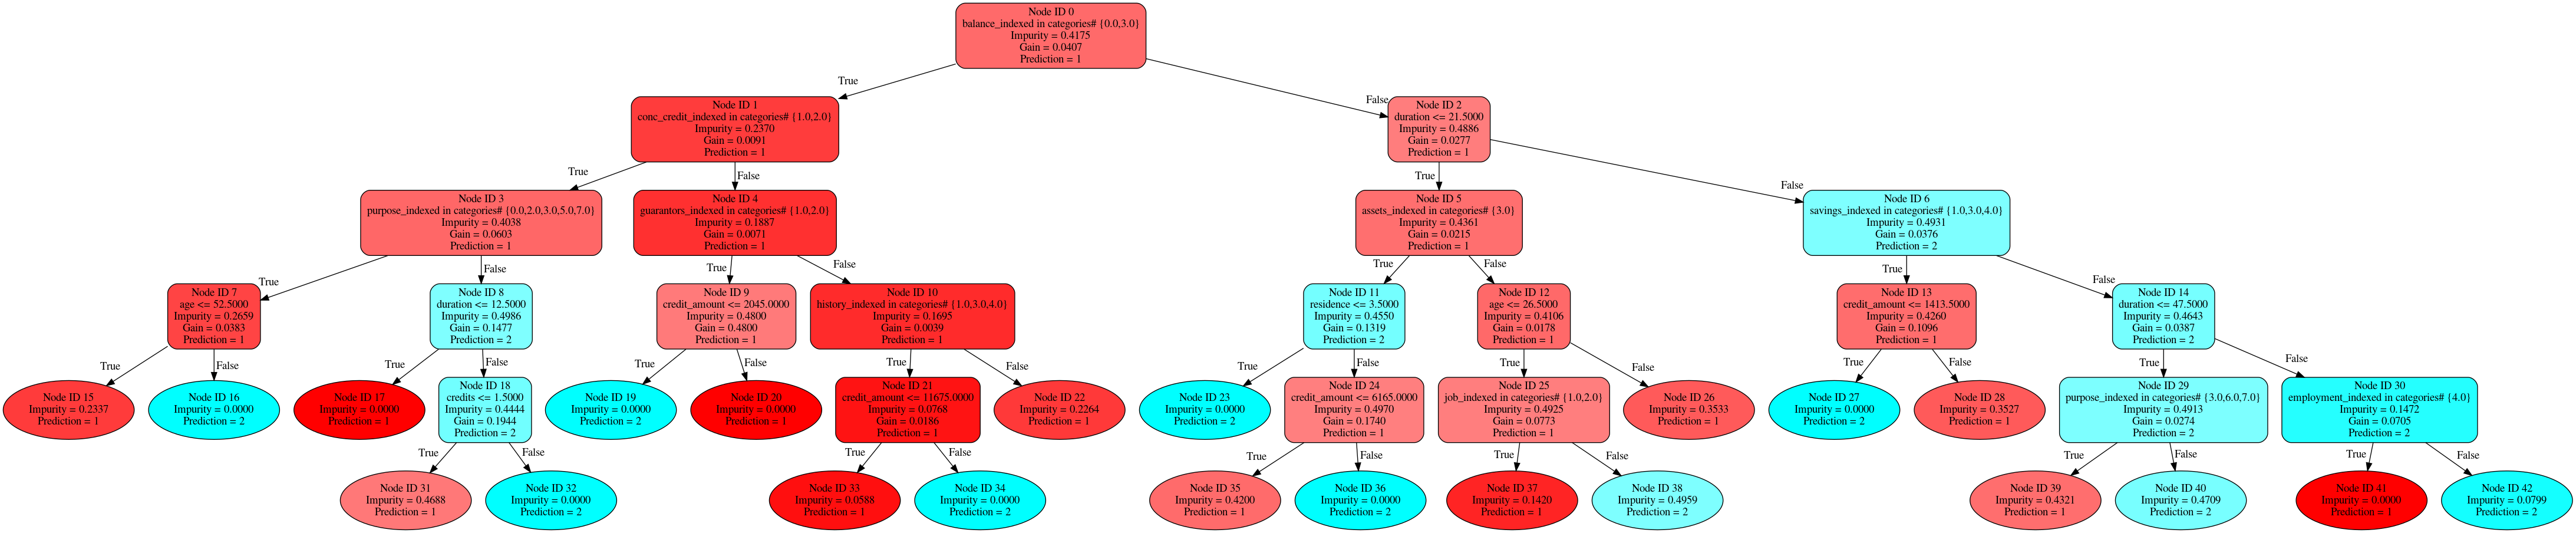

In [17]:
from spark_tree_plotting import export_graphviz
from IPython.display import Image
import pydot
dot_string = export_graphviz(dtModel,
                            featureNames=featureCols,
#                             categoryNames={'balance_indexed':balance_model.labels,
#                                            'history_indexed':history_model.labels,
#                                            'purpose_indexed':purpose_model.labels,
#                                            'savings_indexed':savings_model.labels,
#                                            'employment_indexed':employment_model.labels,
#                                            'sexMarried_indexed':sexMarried_model.labels,
#                                            'guarantors_indexed':guarantors_model.labels,
#                                            'assets_indexed':assets_model.labels,
#                                            'conc_credit_indexed':conc_credit_model.labels,
#                                            'housing_indexed':housing_model.labels,
#                                            'job_indexed':job_model.labels,
#                                            'hasPhone_indexed':hasPhone_model.labels,
#                                            'foreign_indexed':foreign_model.labels
#                             },
                            classNames=credibility_model.labels,
                            filled=True,          # With color!
                            roundedCorners=True,  # Rounded corners in the nodes
                            roundLeaves=True      # Leaves will be ellipses instead of rectangles
                            )
graph = pydot.graph_from_dot_data(dot_string)  
Image(graph.create_png()) 

In [18]:
from spark_tree_plotting import generate_tree_json
tree_json = generate_tree_json(dtModel,
                               withNodeIDs=True # each tree with node ID
                               )
print(tree_json)

{
  "featureIndex": 0, 
  "gain": 0.040727774339828604, 
  "impurity": 0.41748046875, 
  "nodeType": "internal", 
  "splitType": "categorical", 
  "leftCategories": [
    0.0, 
    3.0
  ], 
  "rightCategories": [
    1.0, 
    2.0
  ], 
  "prediction": 0.0, 
  "leftChild": {
    "featureIndex": 13, 
    "gain": 0.00914719538251721, 
    "impurity": 0.23701374924721086, 
    "nodeType": "internal", 
    "splitType": "categorical", 
    "leftCategories": [
      1.0, 
      2.0
    ], 
    "rightCategories": [
      0.0
    ], 
    "prediction": 0.0, 
    "leftChild": {
      "featureIndex": 3, 
      "gain": 0.06032625423207122, 
      "impurity": 0.4038165589412126, 
      "nodeType": "internal", 
      "splitType": "categorical", 
      "leftCategories": [
        0.0, 
        2.0, 
        3.0, 
        5.0, 
        7.0
      ], 
      "rightCategories": [
        1.0, 
        4.0, 
        6.0, 
        8.0, 
        9.0
      ], 
      "prediction": 0.0, 
      "leftChild": {
 